In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [ ]:
I Modèle avec variables de type Features

In [2]:
# Import des .pkl
X_train = pd.read_pickle("../data/X_train_n.pkl")
Y_train = pd.read_pickle("../data/Y_train_n.pkl")
X_test = pd.read_pickle("../data/X_test_n.pkl")
Y_test = pd.read_pickle("../data/Y_test_n.pkl")

In [ ]:
On n'a pas les v. dummy variables pour "hour" et "year"<br>
OK corrigé pour Origin

In [27]:
# Hyperparamètre de régularisation
# alpha = 0.01 to 100 ?

In [5]:
def estimate_ridge(alpha):
    rr = Ridge(alpha)
    rr.fit(X_train, Y_train)

    print(rr.get_params())

    train_score = rr.score(X_train, Y_train)
    test_score = rr.score(X_test, Y_test)

    # R2
    print ("Linear regression train score:", train_score)
    print ("Linear regression test score:", test_score)

    Y_train_prediction = rr.predict(X_train)
    Y_test_prediction = rr.predict(X_test)
    # ROOT MEAN SQUARED on train
    print ("Mean_squared_error for train:", mean_squared_error(Y_train, Y_train_prediction))
    # ROOT MEAN SQUARED on test
    print ("Mean_squared_error for test:", mean_squared_error(Y_test, Y_test_prediction))
    
    return None
estimate_ridge(0.01)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Linear regression train score: 0.959484462210167
Linear regression test score: 0.9071806127886678
Mean_squared_error for train: 1334.9492580246047
Mean_squared_error for test: 3014.2979112261073


In [ ]:
# ROOT MEAN SQUARED LOGARITHMIC ERROR : privilégier des prédictions au-dessous de la vérité
# à calculer ...

In [3]:
# Calcul des Y = log(Y + 1)
Y_train['log_count'] = Y_train['count'].map(lambda x: np.log1p(x))
Y_test['log_count'] = Y_test['count'].map(lambda x: np.log1p(x))

In [4]:
Y_train = Y_train.drop('count', axis = 1)
Y_test = Y_test.drop('count', axis = 1)
# Y_train.head()

In [ ]:
rr = Ridge(0.01)
# Cette fois avec la transformation Log !!!
rr.fit(X_train, Y_train)

print(rr.get_params())

train_score = rr.score(X_train, Y_train)
test_score = rr.score(X_test, Y_test)

# R2
print ("Linear regression train score:", train_score)
print ("Linear regression test score:", test_score)

Y_train_prediction = rr.predict(X_train)
Y_test_prediction = rr.predict(X_test)


# ROOT MEAN SQUARED on train
print ("Mean_squared_error for train:", mean_squared_error(Y_train, Y_train_prediction))
# ROOT MEAN SQUARED on test
print ("Mean_squared_error for test:", mean_squared_error(Y_test, Y_test_prediction))

# print ("Mean_squared_error for train:", mean_squared_error(np.log(Y_train + 1), Y_train_prediction))
# ROOT MEAN SQUARED on test
# print ("Mean_squared_error for test:", mean_squared_error(np.log(Y_test + 1), Y_test_prediction))


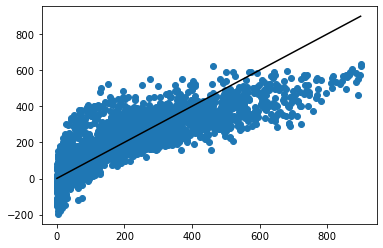

In [15]:
# ATTENTION : ancien plot
plt.scatter(Y_test, Y_test_prediction)
x = [i for i in range(min(Y_test["count"]),max(Y_test["count"]))]
plt.plot(x,"k")
# OLD

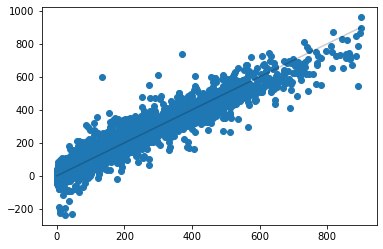

In [7]:
plt.scatter(Y_test, Y_test_prediction)
x = [i for i in range(min(Y_test["count"]),max(Y_test["count"]))]
plt.plot(x,"k",alpha=0.2)

In [68]:
int(max(Y_test["log_count"]))

6

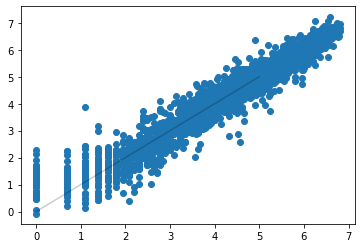

In [69]:
# Avec transformation Log:
plt.scatter(Y_test, Y_test_prediction)
x = [i for i in range(int(min(Y_test["log_count"])),int(max(Y_test["log_count"])))]
plt.plot(x,"k",alpha=0.2)

In [5]:
# Avec transformation Log + 1:
plt.scatter(Y_test, Y_test_prediction)
x = [i for i in range(int(min(Y_test["log_count"])),int(max(Y_test["log_count"])))]
plt.plot(x,"k",alpha=0.2)

NameError: name 'Y_test_prediction' is not defined

On peut améliorer ce modèle en considérant le Log(Y)

In [71]:
import time

In [18]:
now = time.time()
model = Ridge()
parameters = {'alpha':[0.1,0.5,1,5]}
grid = GridSearchCV(model,parameters, cv=5)
grid.fit(X_train, Y_train)
end = time.time()
print (end-now)

412.12203764915466


In [72]:
now = time.time()
model = Ridge()
parameters = {'alpha':[0.1,0.5,1,5]}
grid = GridSearchCV(model,parameters, cv=5)
grid.fit(X_train, Y_train)
end = time.time()
print (end-now)

406.02460837364197


Après transformation log + 1, on peut lancer ceci !

In [123]:
Y_train.head()

,log_count
8620,5.638355
8985,6.725034
6171,5.327876
6473,4.007333
10877,5.472271


In [124]:
#On mettait pas scoring <=> utiliser le R2
model = Ridge()
parameters = {'alpha':[0.1,0.5,1,5]}
grid = GridSearchCV(model,parameters, cv=5, scoring = "neg_mean_squared_error")
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None, param_grid={'alpha': [0.1, 0.5, 1, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [122]:
model = Ridge()
parameters = {'alpha':[0.1,0.5,1,5]}
grid = GridSearchCV(model,parameters, cv=5, scoring= "neg_mean_squared_log_error")
grid.fit(X_train, Y_train)

# Avant sans transformation Log: 
# ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [73]:
grid.best_params_
# OLD : {'alpha': 0.1}
# OLD : {'alpha': 5}

{'alpha': 5}

In [74]:
grid.predict(X_test)

array([[5.59563664],
       [5.84419595],
       [5.50568644],
       ...,
       [4.16221311],
       [3.89232334],
       [5.12275215]])

In [75]:
grid.predict(X_test).shape

(3266, 1)

In [76]:
X_test.shape

(3266, 3912)

In [21]:
X_train.shape

(7620, 75)

In [73]:
# OLD
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040302,0.009796,0.015572,0.005775,0.1,{'alpha': 0.1},0.408625,0.435554,0.368470,0.413126,0.418446,0.408844,0.022154,2
1,0.025101,0.007467,0.008556,0.002011,0.5,{'alpha': 0.5},0.408630,0.435504,0.368562,0.412998,0.418556,0.408850,0.022113,1
2,0.021172,0.001417,0.006845,0.000224,1,{'alpha': 1},0.408616,0.435418,0.368599,0.412850,0.418601,0.408817,0.022078,3
3,0.020471,0.000237,0.007229,0.000387,5,{'alpha': 5},0.408488,0.434866,0.368367,0.412095,0.418285,0.408420,0.021975,4


In [22]:
# NEW
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.063601,0.009798,0.016519,0.007654,0.1,{'alpha': 0.1},0.695364,0.691930,0.691947,0.705021,0.707249,0.698302,0.006555,1
1,0.027166,0.000957,0.007704,0.001051,0.5,{'alpha': 0.5},0.695355,0.692009,0.691836,0.705030,0.707169,0.698280,0.006542,2
2,0.025861,0.000832,0.007228,0.000350,1,{'alpha': 1},0.695315,0.692049,0.691670,0.705007,0.707051,0.698218,0.006534,3
3,0.025729,0.001266,0.007655,0.001650,5,{'alpha': 5},0.694768,0.691915,0.690411,0.704410,0.706289,0.697559,0.006540,4


In [20]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,17.976443,0.777777,0.067092,0.000760,0.1,{'alpha': 0.1},0.910856,0.904322,0.910676,0.919341,0.913630,0.911765,0.004864,4
1,20.338630,1.998034,0.074894,0.009717,0.5,{'alpha': 0.5},0.914682,0.909642,0.915086,0.925060,0.919231,0.916740,0.005153,3
2,20.755371,2.236685,0.069936,0.004754,1,{'alpha': 1},0.916695,0.912185,0.917031,0.927756,0.922132,0.919160,0.005329,2
3,18.709452,0.739696,0.067896,0.000446,5,{'alpha': 5},0.920485,0.917341,0.921209,0.933997,0.928148,0.924236,0.006023,1


In [77]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.390017,1.182693,0.070138,0.001553,0.1,{'alpha': 0.1},0.942436,0.940298,0.940252,0.937445,0.942032,0.940493,0.001762,4
1,18.386863,0.729382,0.086267,0.019814,0.5,{'alpha': 0.5},0.945366,0.943676,0.943951,0.940333,0.946224,0.943910,0.002016,3
2,19.592837,2.544285,0.075212,0.009563,1,{'alpha': 1},0.946722,0.945296,0.945593,0.941876,0.948255,0.945548,0.002110,2
3,20.064529,2.405328,0.077193,0.007971,5,{'alpha': 5},0.950008,0.948259,0.948797,0.946204,0.952432,0.949140,0.002055,1


In [125]:
# avec RMSE
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,21.116701,1.937897,0.070082,0.002954,0.1,{'alpha': 0.1},-0.101494,-0.112348,-0.108871,-0.112570,-0.103257,-0.107708,0.004581,4
1,20.402304,1.645806,0.071645,0.002100,0.5,{'alpha': 0.5},-0.096301,-0.105717,-0.102416,-0.106957,-0.095794,-0.101437,0.004647,3
2,19.373529,0.570412,0.091425,0.045781,1,{'alpha': 1},-0.093943,-0.102637,-0.099572,-0.104031,-0.092139,-0.098464,0.004692,2
3,18.117278,1.047864,0.067364,0.002789,5,{'alpha': 5},-0.088468,-0.097311,-0.094182,-0.096104,-0.084833,-0.092179,0.004764,1


In [78]:
grid.scorer_

<function sklearn.metrics.scorer._passthrough_scorer(estimator, *args, **kwargs)>

In [ ]:
Calcul de la RMLSE avec : grid.predict(X_test) vs Y_test

In [23]:
 grid.predict(X_test).shape

(3266, 1)

In [77]:
Y_test.shape

(3266, 1)

In [ ]:
racine de moyenne sur toutes les observations (log(predict + 1) - log(Y_test + 1))²

In [78]:
 (grid.predict(X_test) + 1).shape

(3266, 1)

In [79]:
(Y_test + 1).shape

(3266, 1)

In [81]:
grid.predict(X_test) + 1

array([[302.48974262],
       [264.1865879 ],
       [235.67672459],
       ...,
       [245.83994175],
       [194.88439679],
       [157.88829321]])

In [88]:
(np.log(grid.predict(X_test) + 1)).shape

/home/osboxes/anaconda3/envs/data/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


(3266, 1)

In [93]:
Y_test.values + 1

array([[245],
       [240],
       [230],
       ...,
       [ 75],
       [ 63],
       [173]])

In [92]:
np.log(Y_test.values + 1)

array([[5.50125821],
       [5.48063892],
       [5.43807931],
       ...,
       [4.31748811],
       [4.14313473],
       [5.15329159]])

In [103]:
(grid.predict(X_test)).shape

(3266, 1)

In [82]:
# for i in range(0,(grid.predict(X_test)).shape[0]):
    # if grid.predict(X_test)[i][0] < 0:
        # print ("Valeur négative pour", i)
        # print (grid.predict(X_test)[i][0])
# print ("Pas de v. nég")        

In [21]:
(grid.predict(X_test)).shape

(3266, 1)

In [23]:
to_update_grid_pred = np.empty([3266, 1])

In [24]:
for i in range(0,(grid.predict(X_test)).shape[0]):
    if grid.predict(X_test)[i][0] < 0:
        # print ("Valeur négative pour", i)
        # print (grid.predict(X_test)[i][0])
        to_update_grid_pred[i][0] = 0
    else:
        to_update_grid_pred[i][0] = grid.predict(X_test)[i][0]

KeyboardInterrupt: 

In [127]:
# prediction = grid.predict(X_test)
# ATTENTION c'est :
prediction = np.exp(grid.predict(X_test)) - 1

In [128]:
ids = np.where(prediction < 0)

In [129]:
ids = np.where(prediction < 0)
prediction[ids] = 0

In [ ]:
# to_update_grid_pred.shape

In [89]:
# OLD : array([1.27170942]) avec Linear regression + Origin = 2900 ème
# np.sqrt(np.mean((np.log(to_update_grid_pred + 1) - np.log(Y_test.values + 1))**2, axis=0))
# OLD : array([1.12650361]) avec Linear regression + Origin = 2800 ème

# devient
np.sqrt(np.mean((np.log(prediction + 1) - np.log(Y_test.values + 1))**2, axis=0))
# array([0.85377923]) avec Linear regression + New = 2680 ème

array([0.11973139])

In [88]:
np.sqrt(np.mean(((prediction) - (Y_test.values))**2, axis=0))

# EST CE QUE C'EST UNE VALEUR correcte ?
# car j'ai transformé les Y en log(Y) avant de fitter les données
# Et donc, j'utilise un simple RMSE et non RMSLE

array([0.34691825])

In [ ]:
array([0.11973139]) ou array([0.34691825]) ?
mais mauvaise formule !

In [132]:
grid.predict(X_test)

array([[5.60874129],
       [5.83534895],
       [5.53638238],
       ...,
       [4.17177703],
       [3.93403134],
       [5.09310317]])

In [131]:
prediction

array([[272.80064493],
       [342.18411979],
       [253.75833648],
       ...,
       [ 64.83055592],
       [ 51.11261532],
       [162.89456748]])

In [133]:
Y_test.values

array([[5.50125821],
       [5.48063892],
       [5.43807931],
       ...,
       [4.31748811],
       [4.14313473],
       [5.15329159]])

In [ ]:
predicted_values = np.exp(grid.predict(X_test)) - 1

In [ ]:
RMLSE = np.sqrt(np.mean((np.log(predicted_values + 1) - np.log(Y_test.values + 1))**2, axis=0))
# RMLSE = np.sqrt(np.mean((np.log(np.exp(grid.predict(X_test))) - np.log(np.exp(Y_test.values) -1 + 1))**2, axis=0))
# RMLSE = np.sqrt(np.mean((np.log(np.exp(grid.predict(X_test))) - np.log(np.exp(Y_test.values)))**2, axis=0))
RMLSE = np.sqrt(np.mean((np.expand_dims(grid.predict(X_test), axis = 1) - Y_test.values)**2, axis=0))

In [135]:
# np.sqrt(np.mean(((prediction) - np.exp(Y_test.values))**2, axis=0))

array([49.82195367])

Linear regression + New : ON N'A PAS FAIT les features polynomiaux sur les var numériques